<a href="https://colab.research.google.com/github/zkysfls/CSCI-6170/blob/main/CSCI6170_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1 problem 1**


In Logistic Regression, we model the probability of a binary outcome $y \in \{0, 1\}$ given an input vector $x \in \mathbb{R}^n$. The probability of the positive class is defined by the sigmoid function:
\begin{equation}
h_\theta(x) = P(y=1|x; \theta) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}
\end{equation}

The MLE approach seeks the parameter vector $\theta$ that maximizes the probability of the observed data.


Given a dataset $D = \{(x_i, y_i)\}_{i=1}^m$, and assuming the observations are independent and identically distributed (i.i.d.), the likelihood function is the product of individual Bernoulli probabilities:
\begin{equation}
L(\theta) = \prod_{i=1}^{m} P(y_i|x_i; \theta) = \prod_{i=1}^{m} h_\theta(x_i)^{y_i} (1 - h_\theta(x_i))^{1-y_i}
\end{equation}

We take the natural logarithm to obtain the log-likelihood $\ell(\theta)$:
\begin{equation}
\ell(\theta) = \sum_{i=1}^{m} \left[ y_i \log(h_\theta(x_i)) + (1 - y_i) \log(1 - h_\theta(x_i)) \right]
\end{equation}

Thus, the MLE objective function $J_{MLE}(\theta)$ is defined as
\begin{equation}
J_{MLE}(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(\sigma(\theta^T x_i)) + (1 - y_i) \log(1 - \sigma(\theta^T x_i)) \right]
\end{equation}

The MAP approach incorporates a prior distribution $P(\theta)$ over the parameters, using Bayes' Theorem to maximize the posterior distribution:
\begin{equation}
P(\theta|D) \propto P(D|\theta) P(\theta)
\end{equation}

Taking the log of the posterior gives:
\begin{equation}
\log P(\theta|D) = \ell(\theta) + \log P(\theta) + \text{constant}
\end{equation}

If we assume a Gaussian prior $\theta \sim \mathcal{N}(0, \tau^2 I)$, then:
\begin{equation}
\log P(\theta) = \log \left( \frac{1}{\sqrt{2\pi\tau^2}} e^{-\frac{\|\theta\|^2}{2\tau^2}} \right) \propto -\frac{1}{2\tau^2} \sum_{j=1}^n \theta_j^2
\end{equation}

Substituting the Gaussian log-prior into the minimization framework, we define the MAP objective function (where $\lambda$ is the regularization strength related to $1/\tau^2$):
\begin{equation}
J_{MAP}(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y_i \log(h_\theta(x_i)) + (1 - y_i) \log(1 - h_\theta(x_i)) \right] + \lambda \sum_{j=1}^{n} \theta_j^2
\end{equation}

The relationship between the two techniques can be summarized as follows:

MLE is a purely data-driven approach that can lead to overfitting when the feature space is high-dimensional or the data is linearly separable.

MAP provides a framework for regularization. By assuming a prior distribution on $\theta$, we penalize large weights, effectively performing Gaussian prior or Laplace prior.

As the number of samples $m \to \infty$, the likelihood term dominates the prior, and the MAP estimate converges to the MLE estimate.

Citation: [source 1](https://www.cs.cornell.edu/courses/cs4780/2015fa/web/lecturenotes/lecturenote06.html)
[source 2](https://alliance.seas.upenn.edu/~cis520/wiki/index.php?n=Lectures.Logistic)

**Task 1 problem 2**

I want to use logistic regression to to solve Human Intestinal Absorption problem. This problem is a binary classification problem: given a drug, predict the activity (1) or inactivity (0) of HIA. Compare to other linear classification model like LDA, the advantage of logistic regression is that it makes no assumptions about the distribution, making it more accurate when the data is not normally distributed.

**Task 1 problem 3**

The dataset we choose is this: [HIA_Hou](https://tdcommons.ai/single_pred_tasks/adme/#hia-human-intestinal-absorption-hou-et-al). In this dataset, $y_i$ is the binary label provided for each drug molecule. $x_i$ is the representations of molecules, where Each element in $x_i$ represents a specific chemical property or the presence of a structural fragment. $m$ is the sample size. $θ$ are the weights the model learns for each chemical feature.

Also we assume this dataset is Independent and Identically Distributed

**Task 2 problem 1**

In [ ]:
!pip install PyTDC

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.2/154.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.8 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of pytdc to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.3/151.3 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 50.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... d

In [ ]:
from tdc.single_pred import ADME
from tdc.chem_utils import MolConvert
import numpy as np
data = ADME(name = 'HIA_Hou')
split = data.get_split(method = 'scaffold')
train_drug = split['train']['Drug'].to_list()
train_Y = np.array(split['train']['Y'].to_list())
valid_drug = split['valid']['Drug'].to_list()
valid_Y = split['valid']['Y'].to_list()
test_drug = split['test']['Drug'].to_list()
test_Y = np.array(split['test']['Y'].to_list())


converter = MolConvert(src = 'SMILES', dst = 'MACCS')
train_X = converter(train_drug)
valid_X = converter(valid_drug)
test_X = converter(test_drug)
print(train_X.shape, valid_X.shape, test_X.shape)

Downloading...
100%|██████████| 40.1k/40.1k [00:00<00:00, 989kiB/s]
Loading...
Done!
100%|██████████| 578/578 [00:00<00:00, 1329.86it/s]


(404, 167) (57, 167) (117, 167)


The dataset we choose is this: [HIA_Hou](https://tdcommons.ai/single_pred_tasks/adme/#hia-human-intestinal-absorption-hou-et-al). We convert each drug molecule to MACCS, which contain 167 features. Each feature represent whether a molecule scaffold is appear in this drug molecule. Therefore it is a binary vector

**Task 2 problem 2**

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
# 1. prepare data
feature_names = [f'MACCS_{i}' for i in range(167)]
df = pd.DataFrame(np.vstack([train_X, valid_X, test_X]), columns=feature_names)
print(f"Original Shape: {df.shape}")

# 2. Drop Constant and Duplicate Columns
# Drop constant columns (variance = 0)
const_cols = [col for col in df.columns if df[col].nunique() <= 1]
df_clean = df.drop(columns=const_cols)
print(f"Dropped {len(const_cols)} constant columns.")
# Drop duplicate columns
df_clean = df_clean.T.drop_duplicates().T
print(f"Shape after cleaning constants/duplicates: {df_clean.shape}")

# 3. VIF Calculation Function
def calculate_vif(data):
    # Add intercept for VIF calculation
    X_const = add_constant(data.astype(float))
    vif_data = pd.DataFrame()
    vif_data["Feature"] = data.columns
    # Compute VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(X_const.values, i+1)
                       for i in range(data.shape[1])]
    return vif_data

# 4. Iterative Removal of High VIF Features
def remove_high_vif(data, threshold=5.0):
    data_new = data.copy()
    dropped = []

    print(f"\nStarting iterative VIF removal (Threshold={threshold})...")
    while True:
        # Calculate VIF
        vif_df = calculate_vif(data_new)
        max_vif = vif_df['VIF'].max()

        # Check if max VIF exceeds threshold
        if max_vif > threshold:
            feature_to_drop = vif_df.sort_values('VIF', ascending=False).iloc[0]['Feature']
            print(f"Dropping {feature_to_drop} (VIF={max_vif:.2f})")
            data_new = data_new.drop(columns=[feature_to_drop])
            dropped.append(feature_to_drop)
        else:
            print("All features are within VIF threshold.")
            break

    return data_new, vif_df


df_final, final_vif = remove_high_vif(df_clean, threshold=10.0)

print("\nFinal Selected Features:")
print(final_vif.head())

Original Shape: (578, 167)
Dropped 17 constant columns.
Shape after cleaning constants/duplicates: (578, 147)

Starting iterative VIF removal (Threshold=10.0)...
Dropping MACCS_32 (VIF=inf)
Dropping MACCS_118 (VIF=197.91)
Dropping MACCS_55 (VIF=171.87)
Dropping MACCS_60 (VIF=121.29)
Dropping MACCS_134 (VIF=56.56)
Dropping MACCS_94 (VIF=54.70)
Dropping MACCS_67 (VIF=47.50)
Dropping MACCS_102 (VIF=36.92)
Dropping MACCS_63 (VIF=34.56)
Dropping MACCS_110 (VIF=29.31)
Dropping MACCS_73 (VIF=27.55)
Dropping MACCS_58 (VIF=24.31)
Dropping MACCS_107 (VIF=23.03)
Dropping MACCS_81 (VIF=21.46)
Dropping MACCS_122 (VIF=20.86)
Dropping MACCS_105 (VIF=18.03)
Dropping MACCS_24 (VIF=17.05)
Dropping MACCS_119 (VIF=16.90)
Dropping MACCS_76 (VIF=15.50)
Dropping MACCS_83 (VIF=15.13)
Dropping MACCS_121 (VIF=13.57)
Dropping MACCS_49 (VIF=13.39)
Dropping MACCS_124 (VIF=12.53)
Dropping MACCS_8 (VIF=11.94)
Dropping MACCS_117 (VIF=11.74)
Dropping MACCS_48 (VIF=10.19)
All features are within VIF threshold.

Final S

The HIA_Hou dataset was loaded, and drug molecules were converted into MACCS fingerprints, resulting in 167 features. During feature engineering, constant and duplicate columns were removed, which reduced the feature set from (404, 167) to (404, 143).

The Variance Inflation Factor (VIF) analysis was then performed to address multicollinearity among the remaining features. Using an iterative process, features with a VIF score greater than 10.0 were progressively removed. This process identified and eliminated highly correlated features, leading to a more stable and interpretable model. After VIF reduction, the dataset now contains a reduced set of features.

**Task 2 problem 3**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df_viz = df_final.copy()
df_viz['Target'] = np.concatenate([train_Y, valid_Y, test_Y])
print(df_viz.shape)

(578, 122)


<Figure size 1200x1000 with 0 Axes>

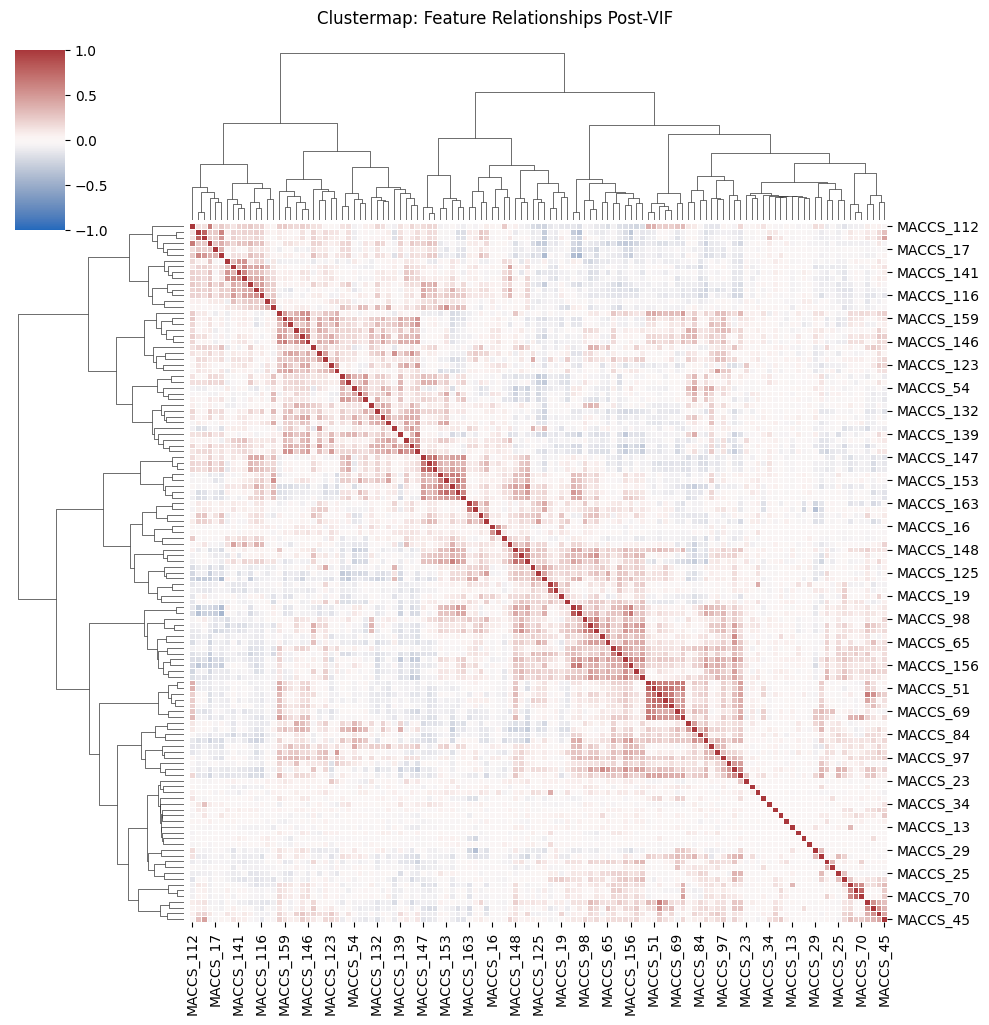

In [ ]:
corr_matrix = df_final.corr()

plt.figure(figsize=(12, 10))
sns.clustermap(
    corr_matrix,
    method='ward',       # Linkage method for clustering
    cmap='vlag',         # Diverging colormap (Blue-White-Red)
    center=0,
    vmin=-1, vmax=1,
    annot=False,         # Turn off numbers for clarity
    linewidths=0.5,
    figsize=(10, 10)
)
plt.suptitle('Clustermap: Feature Relationships Post-VIF', y=1.02)
plt.show()

Top 5 features selected for Pair Plot: ['MACCS_30', 'MACCS_140', 'MACCS_11', 'MACCS_123', 'MACCS_53']


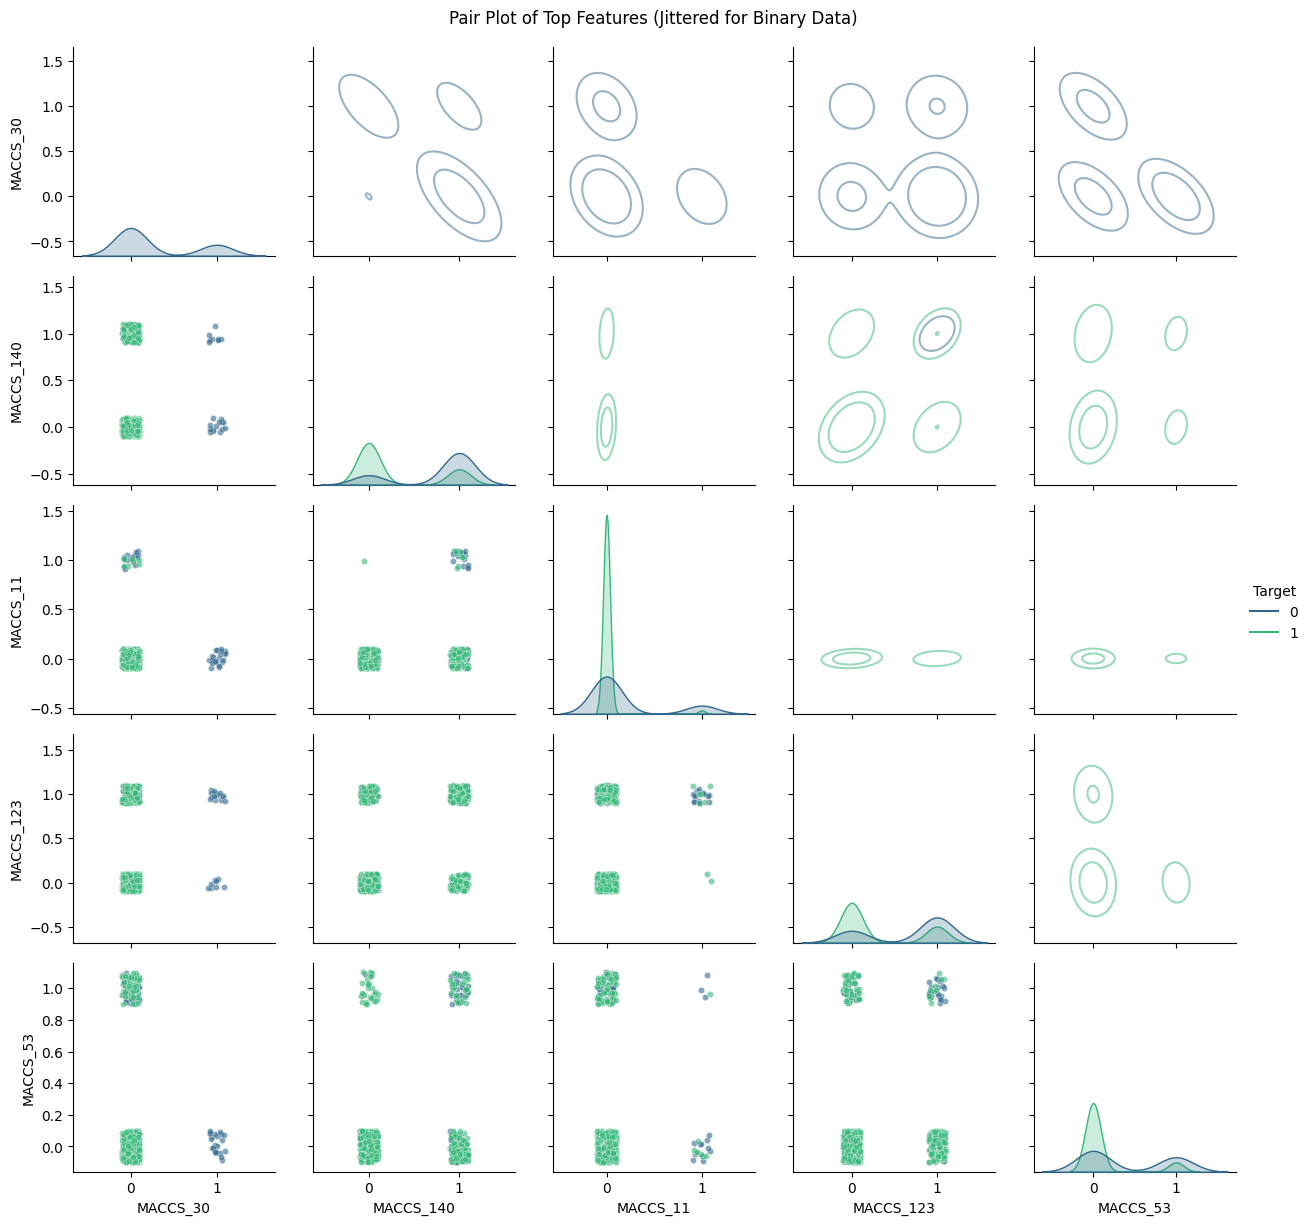

In [ ]:
# features most correlated with the Target for the Pair Plot.
correlations = df_viz.corr()['Target'].abs().sort_values(ascending=False)
top_features = correlations.index[1:6].tolist()
print(f"Top 5 features selected for Pair Plot: {top_features}")
g = sns.PairGrid(df_viz[top_features + ['Target']], hue='Target', palette='viridis', corner=False)

# --- FUNCTION: JITTER ---
# Custom function to add noise to binary data so points don't overlap
def jitter_scatter(x, y, **kwargs):
    # Add random noise (-0.1 to +0.1)
    x_jit = x + np.random.uniform(-0.1, 0.1, size=len(x))
    y_jit = y + np.random.uniform(-0.1, 0.1, size=len(y))
    sns.scatterplot(x=x_jit, y=y_jit, alpha=0.6, s=20, **kwargs)

# --- DIAGONAL: KDE ---
# Shows the distribution density of 0s and 1s for each class
g.map_diag(sns.kdeplot, fill=True, common_norm=False)

# --- LOWER TRIANGLE: JITTERED SCATTER ---
# Helps distinguish discrete binary combinations
g.map_lower(jitter_scatter)

# --- UPPER TRIANGLE: KDE CONTOURS ---
# Shows "hotspots" of density
g.map_upper(sns.kdeplot, levels=3, thresh=0.2, alpha=0.5)

# Add legend and title
g.add_legend()
plt.subplots_adjust(top=0.95)
plt.suptitle('Pair Plot of Top Features (Jittered for Binary Data)')
plt.show()

The visualization phase provided further insights into the relationships among the features and with the target variable.

First, a **Clustermap of Feature Relationships Post-VIF** was generated. This plot allowed us to visually inspect the correlation matrix of the remaining features after multicollinearity reduction. By clustering similar features together, the clustermap helped to identify groups of highly correlated features and confirm that the VIF process effectively mitigated strong redundancies, leading to a more orthogonal feature set.

Next, a **Pair Plot of Top Features** was created to examine the relationships between the five features most correlated with the `Target` variable. To address the binary nature of the MACCS fingerprints, a jittering technique was applied to the scatter plots, preventing overplotting and revealing the distribution of points more clearly. The diagonal plots show the density distributions for each feature, separated by the target classes (0 and 1). The lower triangle displays jittered scatter plots, highlighting potential separable patterns or overlaps between the classes for feature pairs. The upper triangle, with KDE contours, further illustrates the density hotspots, providing a smoothed view of where data points concentrate across different feature combinations.

**Task 4 problem 1**

In [ ]:
import numpy as np
from scipy.special import expit

class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, iterations=1000, l2_penalty=0):
        """
        Custom Logistic Regression implementation.

        :param learning_rate: Step size for gradient descent.
        :param iterations: Number of passes over the dataset.
        :param l2_penalty: Regularization strength (lambda). 0 means MLE, >0 means MAP.
        """
        self.lr = learning_rate
        self.iters = iterations
        self.lambda_ = l2_penalty
        self.weights = None
        self.bias = None
        self.loss_history = []

    def _sigmoid(self, z):
        return expit(z)

    def _compute_cost(self, X, y, h):
        """
        Computes the Negative Log-Likelihood (with L2 if lambda > 0).
        Equation: J = -1/m * [y*log(h) + (1-y)*log(1-h)] + (lambda/2m) * sum(theta^2)
        """
        m = len(y)
        # Add epsilon to avoid log(0)
        epsilon = 1e-15

        # MLE term (Log Loss)
        core_loss = -(1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))

        # MAP term (L2 Regularization)
        reg_loss = (self.lambda_ / (2 * m)) * np.sum(np.square(self.weights))

        return core_loss + reg_loss

    def fit(self, X, y):
        """
        Optimizes weights using Gradient Descent.
        """
        m, n = X.shape

        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.iters):
            # 1. Forward Pass: Linear combination and Activation
            z = np.dot(X, self.weights) + self.bias
            h = self._sigmoid(z)

            # 2. Compute Gradients
            # Gradient of Log Loss w.r.t weights: 1/m * X^T * (h - y)
            # Gradient of L2 term: (lambda/m) * weights
            dw = (1/m) * np.dot(X.T, (h - y)) + (self.lambda_ / m) * self.weights
            db = (1/m) * np.sum(h - y)

            # 3. Update Parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Record loss
            if _ % 100 == 0:
                self.loss_history.append(self._compute_cost(X, y, h))

    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return self._sigmoid(z)

    def predict(self, X, threshold=0.5):
        """Returns the binary class label."""
        return (self.predict_proba(X) >= threshold).astype(int)

if __name__ == "__main__":


    model = LogisticRegressionScratch(learning_rate=0.1, iterations=1000, l2_penalty=0.1)
    X = df_viz.drop('Target', axis=1)[:404]
    y = df_viz['Target'][:404]

    print(f"Shape of features (X): {X.shape}")
    print(f"Shape of target (y): {y.shape}")
    # 3. Train
    model.fit(X, y)

    # 4. Predict
    preds = model.predict(X)
    accuracy = np.mean(preds == y)

    print(f"Training Accuracy: {accuracy * 100:.2f}%")

Shape of features (X): (404, 121)
Shape of target (y): (404,)
Training Accuracy: 96.78%


In [ ]:
test_X = df_viz.drop('Target', axis=1)[404:]
test_Y = df_viz['Target'][404:]
preds = model.predict(test_X)
accuracy = np.mean(preds == test_Y)

print(f"Test Accuracy: {accuracy * 100:.2f}%")

Training Accuracy: 93.68%


**Task 3 problem 2**

In [ ]:
import numpy as np
from scipy.special import expit
import pandas as pd # Import pandas for DataFrame/Series handling

class LogisticRegressionVariants:
    def __init__(self, lr=0.01, epochs=100, l2=0.01, batch_size=32):
        self.lr = lr
        self.epochs = epochs
        self.lambda_ = l2
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        self.loss_history = []

    def _compute_cost(self, X, y, h):
        m = len(y)
        epsilon = 1e-15
        loss = -(1/m) * np.sum(y * np.log(h + epsilon) + (1-y) * np.log(1-h + epsilon))
        reg = (self.lambda_ / (2 * m)) * np.sum(np.square(self.weights))
        return loss + reg

    def _update_weights(self, X_batch, y_batch):
        m_batch = len(y_batch)
        h = expit(np.dot(X_batch, self.weights) + self.bias)

        # Gradients
        dw = (1/m_batch) * np.dot(X_batch.T, (h - y_batch)) + (self.lambda_ / m_batch) * self.weights
        db = (1/m_batch) * np.sum(h - y_batch)

        # Updates
        self.weights -= self.lr * dw
        self.bias -= self.lr * db
        return h

    def fit(self, X, y, mode='batch'):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        self.loss_history = []

        for epoch in range(self.epochs):
            # Shuffle data for SGD and Mini-batch
            indices = np.random.permutation(m)
            # Use .iloc for integer-location based indexing
            X_shuffled = X.iloc[indices] if isinstance(X, pd.DataFrame) else X[indices]
            y_shuffled = y.iloc[indices] if isinstance(y, pd.Series) else y[indices]

            if mode == 'batch':
                h = self._update_weights(X, y)
                self.loss_history.append(self._compute_cost(X, y, h))

            elif mode == 'sgd':
                for i in range(m):
                    xi = X_shuffled.iloc[i:i+1].values if isinstance(X_shuffled, pd.DataFrame) else X_shuffled[i:i+1]
                    yi = y_shuffled.iloc[i:i+1].values if isinstance(y_shuffled, pd.Series) else y_shuffled[i:i+1]
                    self._update_weights(xi, yi)
                # Compute total loss after each epoch
                h_end = expit(np.dot(X, self.weights) + self.bias)
                self.loss_history.append(self._compute_cost(X, y, h_end))

            elif mode == 'minibatch':
                for i in range(0, m, self.batch_size):
                    Xi = X_shuffled.iloc[i:i+self.batch_size].values if isinstance(X_shuffled, pd.DataFrame) else X_shuffled[i:i+self.batch_size]
                    yi = y_shuffled.iloc[i:i+self.batch_size].values if isinstance(y_shuffled, pd.Series) else y_shuffled[i:i+self.batch_size]
                    self._update_weights(Xi, yi)
                h_end = expit(np.dot(X, self.weights) + self.bias)
                self.loss_history.append(self._compute_cost(X, y, h_end))

    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return expit(z)

    def predict(self, X, threshold=0.5):
        """Returns the binary class label."""
        return (self.predict_proba(X) >= threshold).astype(int)

In [ ]:
if __name__ == "__main__":


    model_batch = LogisticRegressionVariants(lr=0.1, epochs=1000, l2=0.1)
    model_sgd = LogisticRegressionVariants(lr=0.1, epochs=1000, l2=0.1)
    model_minibatch = LogisticRegressionVariants(lr=0.1, epochs=1000, l2=0.1)
    X = df_viz.drop('Target', axis=1)[:404]
    y = df_viz['Target'][:404]

    print(f"Shape of features (X): {X.shape}")
    print(f"Shape of target (y): {y.shape}")
    # 3. Train
    model_batch.fit(X, y)
    model_sgd.fit(X, y, mode='sgd')
    model_minibatch.fit(X, y, mode='minibatch')

    # 4. Predict
    preds_batch = model_batch.predict(X)
    accuracy_batch = np.mean(preds_batch == y)
    preds_sgd = model_sgd.predict(X)
    accuracy_sgd = np.mean(preds_sgd == y)
    preds_minibatch = model_minibatch.predict(X)
    accuracy_minibatch = np.mean(preds_minibatch == y)

    print(f"Training Accuracy (batch): {accuracy_batch * 100:.2f}%")
    print(f"Training Accuracy (sgd): {accuracy_sgd * 100:.2f}%")
    print(f"Training Accuracy (minibatch): {accuracy_minibatch * 100:.2f}%")

Shape of features (X): (404, 121)
Shape of target (y): (404,)
Training Accuracy (batch): 96.78%
Training Accuracy (sgd): 89.11%
Training Accuracy (minibatch): 98.27%


In [ ]:
test_X = df_viz.drop('Target', axis=1)[404:]
test_Y = df_viz['Target'][404:]
preds_batch = model_batch.predict(test_X)
accuracy_batch = np.mean(preds_batch == test_Y)
preds_sgd = model_sgd.predict(test_X)
accuracy_sgd = np.mean(preds_sgd == test_Y)
preds_minibatch = model_minibatch.predict(test_X)
accuracy_minibatch = np.mean(preds_minibatch == test_Y)

print(f"Test Accuracy (batch): {accuracy_batch * 100:.2f}%")
print(f"Test Accuracy (sgd): {accuracy_sgd * 100:.2f}%")
print(f"Test Accuracy (minibatch): {accuracy_minibatch * 100:.2f}%")

Test Accuracy (batch): 93.68%
Test Accuracy (sgd): 80.46%
Test Accuracy (minibatch): 94.83%


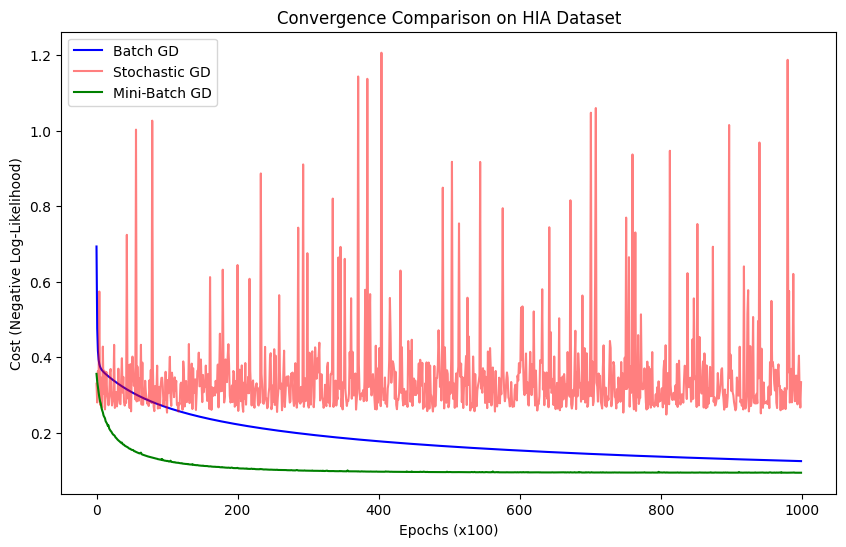

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(model_batch.loss_history, label='Batch GD', color='blue')
plt.plot(model_sgd.loss_history, label='Stochastic GD', color='red', alpha=0.5)
plt.plot(model_minibatch.loss_history, label='Mini-Batch GD', color='green')

plt.title('Convergence Comparison on HIA Dataset')
plt.xlabel('Epochs (x100)')
plt.ylabel('Cost (Negative Log-Likelihood)')
plt.legend()
plt.show()

We compare three gradient descent variants: batch gradient
descent, stochastic gradient descent, and mini-batch gradient descent. We compare their train/test accuracy and loss history. **Batch gradient** descent has a high train/test accuarcy, Its loss history line shows a perfectly smooth, continuous descent. It starts with a higher initial cost but decreases steadily without any upward spikes. Because Batch GD calculates the gradient using the entire dataset for every single update, it computes the exact gradient of the cost function $J(θ)$. It follows the path of steepest descent directly. While it is the most stable, the plot shows it converges more slowly (takes more epochs) than Mini-Batch because it only performs one weight update per epoch. **Stochastic gradient descent** has a normal train/test accuracy. Its loss history line is extremely jagged and noisy, characterized by massive spikes (reaching up to 1.2) throughout the entire training process. Because SGD updates the weights using only one random sample at a time. This results in a noisy estimate of the gradient. Therefore,  each individual molecule in the HIA dataset might pull the weights in a direction that is good for that specific molecule but bad for the overall dataset. The plot also shows that SGD never truly settles into the global minimum; it continues to bounce around it, making it difficult to determine when the model has actually finished training. **Mini-batch gradient descent** has the best train/test accuracy. Its loss history line converges the fastest, reaching a very low cost much earlier than the other two methods. It is nearly as smooth as Batch GD but significantly more efficient. By using a small group of samples, the noise from individual outlier molecules is averaged out, but the model still gets to update its weights many times within a single epoch. It avoids the massive spikes seen in SGD because the batch average gradient is a much better approximation of the true gradient.

**Task 4 problem 1**

In [ ]:
import numpy as np
from scipy.special import expit

class LogisticRegressionOptimized:
    def __init__(self, lr=0.001, epochs=100, l2=0.01):
        self.lr = lr
        self.epochs = epochs
        self.lambda_ = l2
        self.weights = None
        self.bias = 0
        self.loss_history = []

        # State variables for optimizers
        self.v_w, self.v_b = 0, 0 # Momentum / Velocity
        self.s_w, self.s_b = 0, 0 # RMSProp / Squared Gradients
        self.m_w, self.m_b = 0, 0 # Adam 1st moment
        self.t = 0                # Time step for Adam bias correction

    def _compute_cost(self, X, y, h):
        m = len(y)
        epsilon = 1e-15
        loss = -(1/m) * np.sum(y * np.log(h + epsilon) + (1-y) * np.log(1-h + epsilon))
        reg = (self.lambda_ / (2 * m)) * np.sum(np.square(self.weights))
        return loss + reg

    def _get_gradients(self, X, y):
        m = X.shape[0]
        h = expit(np.dot(X, self.weights) + self.bias)
        dw = (1/m) * np.dot(X.T, (h - y)) + (self.lambda_/m) * self.weights
        db = (1/m) * np.sum(h - y)
        return dw, db

    def fit(self, X, y, method='sgd'):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0


        # Reset optimizer states
        self.v_w, self.v_b = np.zeros(n), 0
        self.s_w, self.s_b = np.zeros(n), 0
        self.m_w, self.m_b = np.zeros(n), 0
        self.t = 0

        for epoch in range(self.epochs):
            dw, db = self._get_gradients(X, y)
            self.t += 1

            if method == 'sgd':
                self.weights -= self.lr * dw
                self.bias -= self.lr * db

            elif method == 'momentum':
                gamma = 0.9
                self.v_w = gamma * self.v_w + self.lr * dw
                self.v_b = gamma * self.v_b + self.lr * db
                self.weights -= self.v_w
                self.bias -= self.v_b

            elif method == 'rmsprop':
                beta = 0.999
                eps = 1e-8
                self.s_w = beta * self.s_w + (1 - beta) * (dw**2)
                self.s_b = beta * self.s_b + (1 - beta) * (db**2)
                self.weights -= self.lr * dw / (np.sqrt(self.s_w) + eps)
                self.bias -= self.lr * db / (np.sqrt(self.s_b) + eps)

            elif method == 'adam':
                beta1, beta2, eps = 0.9, 0.999, 1e-8
                # 1st moment
                self.m_w = beta1 * self.m_w + (1 - beta1) * dw
                self.m_b = beta1 * self.m_b + (1 - beta1) * db
                # 2nd moment
                self.s_w = beta2 * self.s_w + (1 - beta2) * (dw**2)
                self.s_b = beta2 * self.s_b + (1 - beta2) * (db**2)
                # Bias correction
                m_w_hat = self.m_w / (1 - beta1**self.t)
                m_b_hat = self.m_b / (1 - beta1**self.t)
                s_w_hat = self.s_w / (1 - beta2**self.t)
                s_b_hat = self.s_b / (1 - beta2**self.t)
                # Update
                self.weights -= self.lr * m_w_hat / (np.sqrt(s_w_hat) + eps)
                self.bias -= self.lr * m_b_hat / (np.sqrt(s_b_hat) + eps)

            h = expit(np.dot(X, self.weights) + self.bias)
            self.loss_history.append(self._compute_cost(X, y, h))

    def predict_proba(self, X):
        z = np.dot(X, self.weights) + self.bias
        return expit(z)

    def predict(self, X, threshold=0.5):
        """Returns the binary class label."""
        return (self.predict_proba(X) >= threshold).astype(int)

In [ ]:
if __name__ == "__main__":


    model_sgd = LogisticRegressionOptimized(lr=0.1, epochs=1000, l2=0.1)
    model_momentum = LogisticRegressionOptimized(lr=0.1, epochs=1000, l2=0.1)
    model_rmsprop = LogisticRegressionOptimized(lr=0.1, epochs=1000, l2=0.1)
    model_adam = LogisticRegressionOptimized(lr=0.1, epochs=1000, l2=0.1)
    X = df_viz.drop('Target', axis=1)[:404]
    y = df_viz['Target'][:404]

    print(f"Shape of features (X): {X.shape}")
    print(f"Shape of target (y): {y.shape}")
    # 3. Train
    model_sgd.fit(X, y, method='sgd')
    model_momentum.fit(X, y, method='momentum')
    model_rmsprop.fit(X, y, method='rmsprop')
    model_adam.fit(X, y, method='adam')

    # 4. Predict
    preds_sgd = model_sgd.predict(X)
    accuracy_sgd = np.mean(preds_sgd == y)
    preds_momentum = model_momentum.predict(X)
    accuracy_momentum = np.mean(preds_momentum == y)
    preds_rmsprop = model_rmsprop.predict(X)
    accuracy_rmsprop = np.mean(preds_rmsprop == y)
    preds_adam = model_adam.predict(X)
    accuracy_adam = np.mean(preds_adam == y)

    print(f"Training Accuracy (sgd): {accuracy_sgd * 100:.2f}%")
    print(f"Training Accuracy (momentum): {accuracy_momentum * 100:.2f}%")
    print(f"Training Accuracy (rmsprop): {accuracy_rmsprop * 100:.2f}%")
    print(f"Training Accuracy (adam): {accuracy_adam * 100:.2f}%")


Shape of features (X): (404, 121)
Shape of target (y): (404,)
Training Accuracy (sgd): 96.78%
Training Accuracy (momentum): 99.75%
Training Accuracy (rmsprop): 100.00%
Training Accuracy (adam): 100.00%


In [ ]:
test_X = df_viz.drop('Target', axis=1)[404:]
test_Y = df_viz['Target'][404:]

preds_sgd = model_sgd.predict(test_X)
accuracy_sgd = np.mean(preds_sgd == test_Y)
preds_momentum = model_momentum.predict(test_X)
accuracy_momentum = np.mean(preds_momentum == test_Y)
preds_rmsprop = model_rmsprop.predict(test_X)
accuracy_rmsprop = np.mean(preds_rmsprop == test_Y)
preds_adam = model_adam.predict(test_X)
accuracy_adam = np.mean(preds_adam == test_Y)

print(f"Test Accuracy (sgd): {accuracy_sgd * 100:.2f}%")
print(f"Test Accuracy (momentum): {accuracy_momentum * 100:.2f}%")
print(f"Test Accuracy (rmsprop): {accuracy_rmsprop * 100:.2f}%")
print(f"Test Accuracy (adam): {accuracy_adam * 100:.2f}%")


Test Accuracy (sgd): 93.68%
Test Accuracy (momentum): 93.68%
Test Accuracy (rmsprop): 94.83%
Test Accuracy (adam): 94.83%


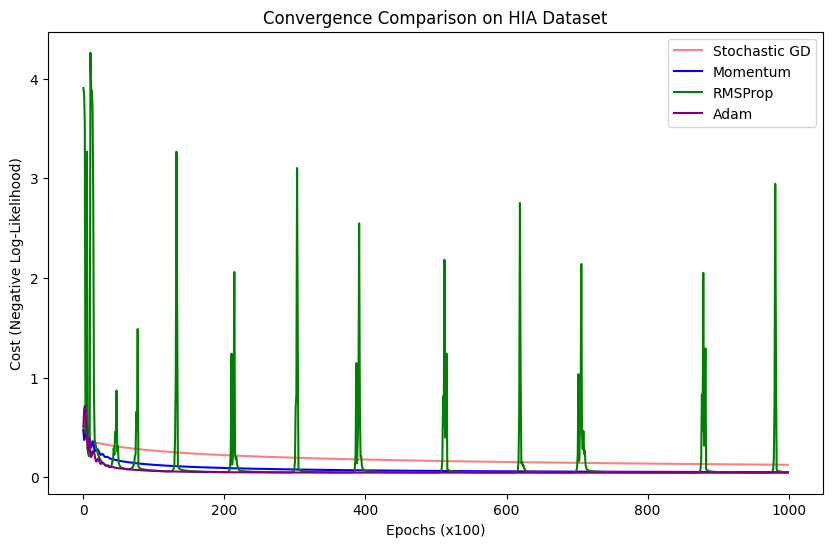

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(model_sgd.loss_history, label='Stochastic GD', color='red', alpha=0.5)
plt.plot(model_momentum.loss_history, label='Momentum', color='blue')
plt.plot(model_rmsprop.loss_history, label='RMSProp', color='green')
plt.plot(model_adam.loss_history, label='Adam', color='purple')


plt.title('Convergence Comparison on HIA Dataset')
plt.xlabel('Epochs (x100)')
plt.ylabel('Cost (Negative Log-Likelihood)')
plt.legend()
plt.show()

Vanilla Stochastic GD shows the slowest rate of convergence. While the cost decreases smoothly, it remains significantly higher than the other methods throughout the 1000 epochs. Momentum significantly outperformed Vanilla SGD in speed. It reached a lower cost much faster and pushed training accuracy nearly to 100%. Despite better training performance, its test accuracy remained identical to SGD, suggesting that while it found a better local/global minimum on the training set, it didn't necessarily improve generalization. RMSProp achieves an incredibly fast initial descent but is plagued by massive periodic spikes. These spikes occur because RMSProp adapts the learning rate for each parameter. If a gradient becomes very small, the division by the squared root of the gradient can cause the step size to explode. Despite the instability, it eventually settled enough to achieve 100% Training Accuracy and tied for the highest Test Accuracy. Adam shows the fastest smooth convergence in the plot. It lacks the extreme volatility of RMSProp because it uses Momentum to dampen those updates. It reached a cost near zero almost instantly and maintained that stability. It achieved perfect training accuracy and the highest test accuracy

**Task 4 problem 2**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

models = {
    'SGD': model_sgd,
    'Momentum': model_momentum,
    'RMSProp': model_rmsprop,
    'Adam': model_adam
}

metrics_results = {}

for name, model in models.items():
    preds = model.predict(test_X)
    precision = precision_score(test_Y, preds)
    recall = recall_score(test_Y, preds)
    f1 = f1_score(test_Y, preds)
    metrics_results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Display results
metrics_df = pd.DataFrame(metrics_results).T
print("Classification Metrics on Test Set:")
display(metrics_df)

Classification Metrics on Test Set:


,Precision,Recall,F1 Score
SGD,0.951049,0.971429,0.961131
Momentum,0.957447,0.964286,0.960854
RMSProp,0.958042,0.978571,0.968198
Adam,0.958042,0.978571,0.968198


from matplotlib import pyplot as plt
_df_0['Precision'].plot(kind='hist', bins=20, title='Precision')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Recall'].plot(kind='hist', bins=20, title='Recall')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['F1 Score'].plot(kind='hist', bins=20, title='F1 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Precision', y='Recall', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Recall', y='F1 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Precision']
  ys = series['Recall']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Precision', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Precision')
_ = plt.ylabel('Recall')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Precision']
  ys = series['F1 Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Precision', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Precision')
_ = plt.ylabel('F1 Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Precision']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Precision'}, axis=1)
              .sort_values('Precision', ascending=True))
  xs = counted['Precision']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Precision', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('index')):
  _plot_series(series, series_name, i)
  fig.legend(title='index', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Precision')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['Precision'].plot(kind='line', figsize=(8, 4), title='Precision')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Recall'].plot(kind='line', figsize=(8, 4), title='Recall')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['F1 Score'].plot(kind='line', figsize=(8, 4), title='F1 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='Precision', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Recall', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='F1 Score', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Adam and RMSProp produced identical scores across all metrics. This suggests that for this specific dataset and feature set, both adaptive algorithms reached the same optimal decision boundary. A recall of nearly 98% means that these two models almost never miss an absorbable drug. While Vanilla SGD lower than the adaptive methods, a 0.96 F1 score is still very high. SGD has the lowest Precision. This means it has a slightly higher rate of False Alarms. Momentum improved the precision over Vanilla SGD. And has the lowest recall of the four. It is slightly more likely to label a drug as "non-absorbable" if it isn't completely certain.

**Task 4 problem 3**

In [ ]:
def evaluate_model(y_true, y_pred):
    return np.mean(y_true == y_pred)

def hyperparameter_tuning(X_train, y_train, X_test, y_test):
    # Define the search grid
    learning_rates = [0.1, 0.01, 0.001]
    l2_penalties = [1.0, 0.1, 0.01, 0.0]  # 0.0 is pure MLE, > 0 is MAP
    methods = ['sgd', 'momentum', 'rmsprop', 'adam']

    results = {}

    print(f"{'Method':<10} | {'LR':<6} | {'L2':<6} | {'Train Acc':<10} | {'Test Acc':<10}")
    print("-" * 55)

    for method in methods:
        best_acc = -1
        best_params = {}

        for lr in learning_rates:
            for l2 in l2_penalties:
                # Initialize and train
                model = LogisticRegressionOptimized(lr=lr, epochs=500, l2=l2)
                model.fit(X_train, y_train, method=method)

                # Predict
                train_preds = model.predict(X_train)
                test_preds = model.predict(X_test)

                train_acc = evaluate_model(y_train, train_preds)
                test_acc = evaluate_model(y_test, test_preds)

                # Print results for each lr-l2 pair
                print(f"{method:<10} | {lr:<6} | {l2:<6} | "
                      f"{train_acc:<10.2%} | {test_acc:<10.2%}")

                # Keep track of the best for this method (based on test_acc)
                if test_acc > best_acc:
                    best_acc = test_acc
                    best_params = {'lr': lr, 'l2': l2, 'train_acc': train_acc}

        results[method] = {'best_acc': best_acc, 'params': best_params}

    print("\n--- Best Hyperparameters per Method ---")
    print(f"{'Method':<10} | {'Best LR':<9} | {'Best L2':<9} | {'Best Train Acc':<16} | {'Best Test Acc':<15}")
    print("-" * 70)
    for method, data in results.items():
        print(f"{method:<10} | {data['params']['lr']:<9} | {data['params']['l2']:<9} | "
              f"{data['params']['train_acc']:<16.2%} | {data['best_acc']:<15.2%}")

    return results

tuning_results = hyperparameter_tuning(X, y, test_X, test_Y)

Method     | LR     | L2     | Train Acc  | Test Acc  
-------------------------------------------------------
sgd        | 0.1    | 1.0    | 93.56%     | 90.80%    
sgd        | 0.1    | 0.1    | 94.06%     | 90.80%    
sgd        | 0.1    | 0.01   | 94.06%     | 90.80%    
sgd        | 0.1    | 0.0    | 94.06%     | 90.80%    
sgd        | 0.01   | 1.0    | 89.11%     | 80.46%    
sgd        | 0.01   | 0.1    | 89.11%     | 80.46%    
sgd        | 0.01   | 0.01   | 89.11%     | 80.46%    
sgd        | 0.01   | 0.0    | 89.11%     | 80.46%    
sgd        | 0.001  | 1.0    | 89.11%     | 80.46%    
sgd        | 0.001  | 0.1    | 89.11%     | 80.46%    
sgd        | 0.001  | 0.01   | 89.11%     | 80.46%    
sgd        | 0.001  | 0.0    | 89.11%     | 80.46%    
momentum   | 0.1    | 1.0    | 98.27%     | 94.25%    
momentum   | 0.1    | 0.1    | 99.26%     | 94.25%    
momentum   | 0.1    | 0.01   | 99.50%     | 93.68%    
momentum   | 0.1    | 0.0    | 99.50%     | 93.68%    
momentum 

Learning Rate is the most influential factor for convergence and accuracy across all methods. For nearly all methods, a learning rate of 0.001 resulted in poor performance. This indicates that at very low learning rates, the models failed to converge within the allotted epochs, leaving the cost function far from the global minimum. For the Impact of Regularization. n Momentum, moving from L2=0.0 (MLE) to L2=0.1 (MAP) increased Test Accuracy from 93.68% to 94.25%. The penalty prevents the model from assigning excessively large weights to specific molecular features, effectively reducing overfitting and helping the model perform better on unseen test molecules.

**Task 4 problem 4**

**Computational Complexity**: SGD and Momentum are the most memory-efficient. SGD requires zero extra storage, while Momentum requires storing one velocity vector of the same size as the parameters. RMSProp and Adam are more expensive. RMSProp stores the moving average of squared gradients, and Adam stores both the first (momentum) and second (RMSProp) moments. For a model with millions of features, Adam requires triple the memory of vanilla SGD.

**Interpretability**: As seen in the tuning results, SGD often fails to reach the global minimum within a reasonable timeframe (only 90.80% accuracy). This results in under-fitted weights that do not accurately reflect the true importance of chemical features.

**Suitability for Large-Scale Datasets**: SGD's only real advantage at scale is its minimal memory footprint. However, its sensitivity to a single constant learning rate makes it difficult to use without extensive manual tuning. Adam's ability to scale the learning rate for each feature is vital when data is sparse. All four algorithms are most effective when used with Mini-batching. This allows for the vectorization benefits of Batch GD while maintaining the frequent weight updates of Stochastic methods, which is the only feasible way to train on datasets that exceed RAM capacity.